<a href="https://colab.research.google.com/github/GuiRibCarra/Fuzzy-Logic/blob/main/Fuzzy_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logica Fuzzy : Exemplo de gorjetas

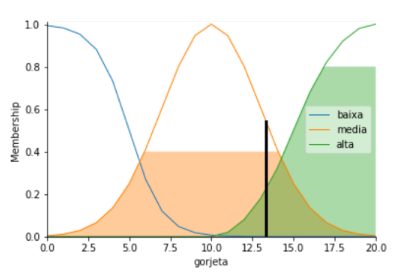

Antecedentes (entradas):
  Serviço: notas de 0 a 10 , sendo classificadas como ruim, aceitavel e otimo
  Qualidade da Comida: notas de 0 a 10, sendo classificadas como ruim, boa, saborosa

Consequentes (saidas):
  Gorjeta: entre 0% a 20%, classificadas como baixa, media, alta

Regras:
*   Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa
*   Se o serviço for médio então a gorjeta será média
*   Se o serviço for bom e a qualidade da comida for saborosa então a gorjeta será alta



# Bibliotecas

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=930bba5480dbc6f2525c6a8376a32659537436f8c593cbec19518dc2ddc6a2be
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedentes e Consequentes

In [ ]:
qualidade = ctrl.Antecedent(np.arange(0,11,1), 'Qualidade')
servico = ctrl.Antecedent(np.arange(0,11,1), 'Servico')
gorjeta = ctrl.Consequent(np.arange(0,21,1), 'Gorjeta')
gorjeta2 = ctrl.Consequent(np.arange(0,21,1), 'Gorjeta_2')

# Funções e Graficos

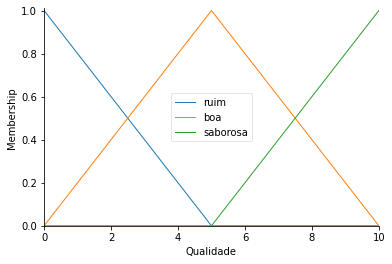

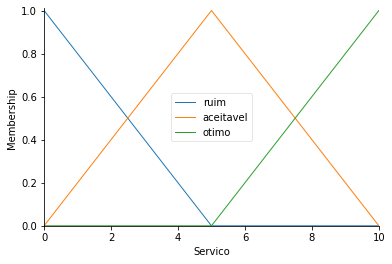

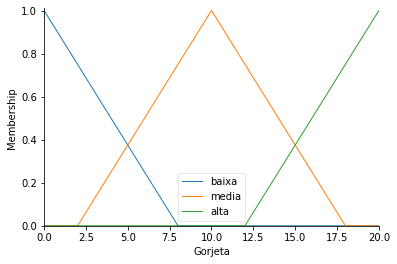

In [ ]:
qualidade.automf(number = 3, names=['ruim','boa','saborosa'])
servico.automf(number = 3, names=['ruim','aceitavel','otimo'])

qualidade.view()
servico.view()

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe,[0,0,8])
gorjeta['media'] = fuzz.trimf(gorjeta.universe,[2,10,18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe,[12,20,20])

gorjeta.view()

Regras

In [ ]:
regra_1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra_2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra_3 = ctrl.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta['alta'])

# Sistema de controle


17.333333333333332


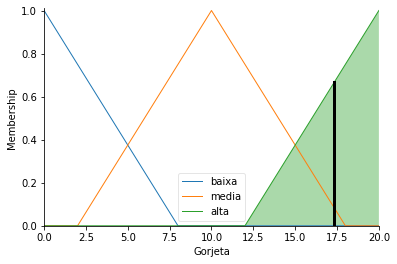

In [ ]:
sistema_controle = ctrl.ControlSystem([regra_1,regra_2,regra_3])

sistema = ctrl.ControlSystemSimulation(sistema_controle)

sistema.input['Qualidade'] = 10
sistema.input['Servico'] = 10
sistema.compute()

print(sistema.output['Gorjeta'])
gorjeta.view(sim = sistema)

# Teste com outros tipos de grafico

5.662380878042331


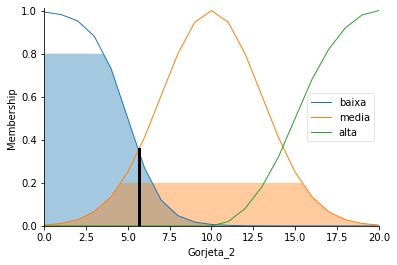

In [ ]:
gorjeta2['baixa'] = fuzz.sigmf(gorjeta2.universe, 5, -1)
gorjeta2['media'] = fuzz.gaussmf(gorjeta2.universe, 10, 3)
gorjeta2['alta'] = fuzz.pimf(gorjeta2.universe, 10, 20, 20, 21)

regra2_1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta2['baixa'])
regra2_2 = ctrl.Rule(servico['aceitavel'], gorjeta2['media'])
regra2_3 = ctrl.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta2['alta'])

sistema_controle2 = ctrl.ControlSystem([regra2_1,regra2_2,regra2_3])

sistema2 = ctrl.ControlSystemSimulation(sistema_controle2)

sistema2.input['Qualidade'] = 1
sistema2.input['Servico'] = 1
sistema2.compute()

print(sistema2.output['Gorjeta_2'])
gorjeta2.view(sim = sistema2)